<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [239]:
import pandas as pd
import psycopg2

dbname — название базы, к которой нужно подключиться;

user — имя пользователя в СУБД;

password — пароль;

host — адрес, по которому нужно подключиться;

port — порт, к которому нужно подключиться (по умолчанию равен 5432).

In [241]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [242]:
# текст запроса
query_3_1 = f'''select count(*)
           from vacancies
        '''

In [243]:
# результат запроса
import warnings
warnings.filterwarnings('ignore')

df = pd.read_sql_query(query_3_1, connection);
print('Количество вакансий в базе: {} '.format(df['count'].iloc[0]));

Количество вакансий в базе: 49197 


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [244]:
# текст запроса
query_3_2 = f'''select count(*)
           from employers
        '''

In [245]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)

print('Количество работодателей в базе: {} '.format(df['count'].iloc[0]));

Количество работодателей в базе: 23501 


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [246]:
# текст запроса
query_3_3 = f'''select count(*)
           from areas
        '''

In [247]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
print('Количество регионов в базе: {} '.format(df['count'].iloc[0]));

Количество регионов в базе: 1362 


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [248]:
# текст запроса
query_3_4 = f'''select count(*)
           from industries
        '''

In [249]:
# результат запроса

df = pd.read_sql_query(query_3_4, connection)
print('Количество сфер деятельности в базе: {} '.format(df['count'].iloc[0]));

Количество сфер деятельности в базе: 294 


***

# выводы по предварительному анализу данных

Предварительный анализ данных показал, что база состоит из более 49 тысяч вакансий от более чем 23 тысяч работодателей по России и другим странам. 

Предложенные в базе вакансии представлены для почти 300 разлисных сфер деятельности.

### Проверим количество пропущеных в базе вакансей данных.

In [250]:
# Загрузим все предоставленные базы в соответствующие датафреймы с помощью цикла
for xx in ['vacancies','areas','employers_industries','industries','employers']: 
    #print( xx + " = f'''select *; from " + xx +" ''' ")
    exec( xx + " = f'''select * from " + xx +" ''' ");
    exec( xx + "_df = pd.read_sql_query("+ xx +", connection)") ;

# Выводим информцию об этих датафреймах, чтобы проверить типы данных и наличие пропусков    
display(vacancies_df.info());
display(areas_df.info());
display(employers_df.info());
display(employers_industries_df.info());
display(industries_df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49197 entries, 0 to 49196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49197 non-null  int64  
 1   name         49197 non-null  object 
 2   key_skills   40741 non-null  object 
 3   schedule     49197 non-null  object 
 4   experience   49197 non-null  object 
 5   employment   49197 non-null  object 
 6   salary_from  21485 non-null  float64
 7   salary_to    12690 non-null  float64
 8   area_id      49197 non-null  int64  
 9   employer_id  49197 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1362 non-null   int64 
 1   name    1362 non-null   object
dtypes: int64(1), object(1)
memory usage: 21.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23501 non-null  int64 
 1   name    23501 non-null  object
 2   area    23501 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32333 entries, 0 to 32332
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employer_id  32333 non-null  int64 
 1   industry_id  32333 non-null  object
dtypes: int64(1), object(1)
memory usage: 505.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      294 non-null    object
 1   name    294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


None

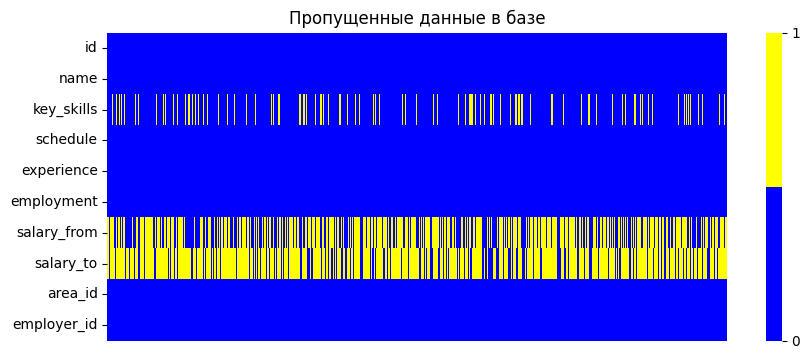

In [251]:
# Загружаем необходимые для визуализации библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

# Строим тепловую карту, где желтым отмечены пропущеные значения
cbar_kws = { 'ticks' : [0,1] }
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
ax = sns.heatmap(
    vacancies_df.T.isnull(), # Создаем карту пропущенных значений в базе данных
    cmap=sns.color_palette(colors),
    xticklabels=False,
    cbar_kws = cbar_kws
)
ax.set_title('Пропущенные данные в базе');

Вывод:

Данные в базе представленны в соответствующих форматах.

В базе иногда отсутствуют данные по необходимым квалификациям кадидата (key_skills), а также данные по границам заработной платы.

В остальном база выглядит полной.

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [252]:
# текст запроса
query_4_1 = f'''select count(*) cnt, a.name
           from vacancies v 
           join areas a on v.area_id=a.id
           group by a.name
           order by 1 desc
           limit 5
        '''

In [253]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,cnt,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [254]:
# текст запроса
query_4_2 = f'''select count(*) 
           from vacancies v 
           where v.salary_from > 0 or v.salary_to > 0
        '''

In [255]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [256]:
# текст запроса
query_4_3 = f'''select avg(v.salary_from) avg_from, 
                        avg(v.salary_to) avg_to
                from vacancies v 
                '''


In [257]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
round(df)

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [258]:
# текст запроса
query_4_4 = f'''select *, count(*) cnt
                from (
                    select format( '%s - %s', v.schedule , v.employment)
                    from vacancies v 
                     ) as foo
                group by 1
                order by 2 desc
                '''

In [259]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,format,cnt
0,Полный день - Полная занятость,35367
1,Удаленная работа - Полная занятость,7802
2,Гибкий график - Полная занятость,1593
3,Удаленная работа - Частичная занятость,1312
4,Сменный график - Полная занятость,940
5,Полный день - Стажировка,569
6,Вахтовый метод - Полная занятость,367
7,Полный день - Частичная занятость,347
8,Гибкий график - Частичная занятость,312
9,Полный день - Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [260]:
# текст запроса
query_4_5 = f'''select v.experience, count(*) cnt
                from vacancies v 
                group by 1
                order by 2 asc
                '''

In [261]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий

Наибольшее количество вакансий представленно по городу Москве.

In [262]:
#import plotly
#import plotly.express as px
#print(plotly.__version__)

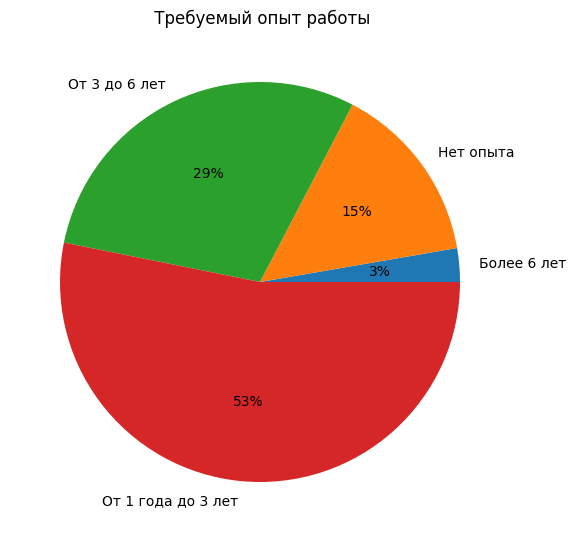

In [263]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
p = axes.pie(
    df['cnt'],
    labels=df['experience'],
    autopct='%1.0f%%',
);
plt.title(' Требуемый опыт работы');

Наибольшее количество работодателей ищут людей с небольшим опытом работы. 
Это происходит от того, что работодатель не хочет тратить время на обучение сотро=удника, но при этом хочет платить не слишком большую зарплату.

### Посмотрим на зависимость границ заработной платы от опыта и типа занятости

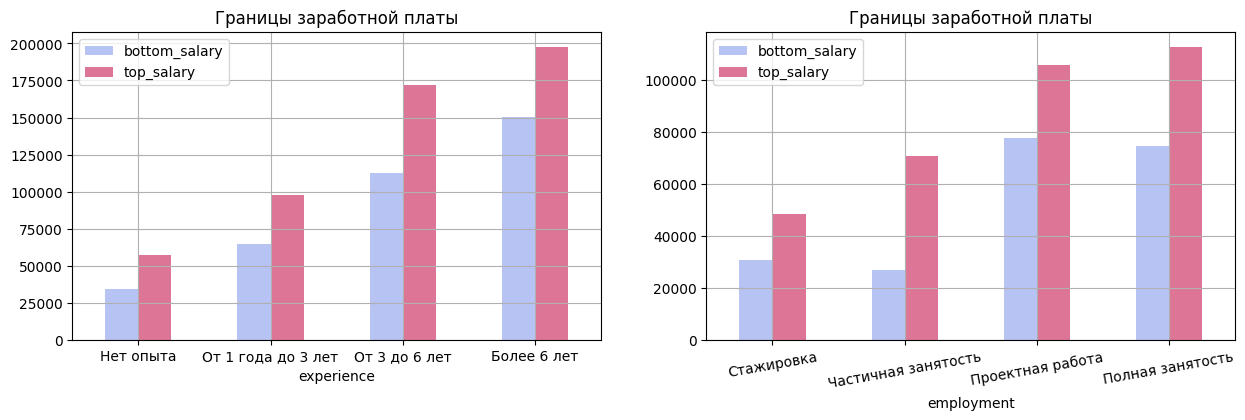

In [264]:

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 4))
i=0

for param in ['experience', 'employment']:
    query_1b = f'''select v.'''+ param +''' , avg(v.salary_from) bottom_salary, avg(salary_to) top_salary
                from vacancies v
                group by 1
                order by 3
                '''
    hh_df = pd.read_sql_query(query_1b, connection)
    #display(hh_df)
    # Строим диаграмму
    p = hh_df.plot.bar(rot=10*i,
        #figsize=[8,4],
        color=['#B7C3F3','#DD7596'],
        x = param,
        grid='on',
        ax = axes[i]
        );
    p.set_title('Границы заработной платы'); 
    i+=1  

Размер заработной платы значительно растет с опытом кандидата. 

Наибольшие зарплаты предлагают на вакансиях с **проектными работами** и работами с **полной занятостью**. 

Самый большой разброс между наибольшей и наименьшей заработной платой наблюдается для вакансий с частичной занятостью. 
Причина сильного разброса, скорее всего, заключается в том, что на частичную занятость могут требоваться как новички, так и проффессионалы высокого уровня, в зависимости от задачи, которую компании требуется решить. 

### Выводим топ-10 самых востребованных должностей по базе

In [265]:
# # текст запроса
query_1a = f'''select v.name, count(v.id)
           from vacancies v
           group by v.name
           order by 2 desc
           limit 10
           --having count(v.id)>1
        '''
hh_df = pd.read_sql_query(query_1a, connection)
hh_df

,name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


Вывод:

Самыми востребованными профессиями являются **системный администратор** и **Программист С1**.

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [266]:
# текст запроса
query_5_1 = f'''select e.name, count(*) cnt
                from  vacancies v 
                join employers e on e.id=v.employer_id
                group by 1
                order by 2 desc
                limit 5
                '''

In [267]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
display(df)
print('На первом и пятом месте по количеству вакансий находятся: \n {}'.format( df['name'].iloc[0] + ' - ' + df['name'].iloc[4] ) )

,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


На первом и пятом месте по количеству вакансий находятся: 
 Яндекс - Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [268]:
query_5_2 = f'''select 
                    a.name,
                    count(e.id) emp_cnt,
                    count(v.id) vac_cnt
                from areas a
                left join employers e on a.id = e.area
                left join vacancies v on a.id = v.area_id
                --where count(v.id) is null
                group by a.name
                having count(v.id) = 0
                order by 2 desc
'''

In [269]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df['name'].iloc[0]

'Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.

In [270]:
# текст запроса
query_5_3 = f'''select 
                    v.employer_id, 
                    count(distinct v.area_id)
                from vacancies v
                group by 1
                order by 2 desc
                limit 4
            '''

In [271]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
display(df)
print('Наибольшее количество вакансий от одного работодателя: {} '.format(df['count'].iloc[0]));


,employer_id,count
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88


Наибольшее количество вакансий от одного работодателя: 181 


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [272]:
# текст запроса
query_5_4 = f'''select 
                    count(e.name)
                from employers e 
                left join employers_industries ei on e.id=ei.employer_id
                where ei.employer_id is null
            '''

In [273]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
print('Количества работодателей c не указанной сферой деятельности: {} '.format( df['count'][0] ))

Количества работодателей c не указанной сферой деятельности: 8419 


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [274]:
# текст запроса
query_5_5 = f'''select name 
                from employers e 
                left join employers_industries ei on e.id = ei.employer_id 
                group by e.id 
                having count(ei.industry_id) = 4 
                order by name 
                offset 2 limit 1 
            '''

In [275]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
print('Ответ:   {} '.format(df['name'].iloc[0]));


Ответ:   2ГИС 


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [276]:
# текст запроса
query_5_6 = f'''select i.name , count(e.id)
                from employers e 
                left join employers_industries ei on e.id = ei.employer_id 
                left join industries i on i.id = ei.industry_id 
                where i.name = 'Разработка программного обеспечения'  
                --where i.id = '7.540'
                group by i.name
                --having i.name = 'Разработка программного обеспечения' 
            '''

In [277]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
display(df)

print('У {} работодателей в качестве сферы деятельности указана Разработка программного обеспечения'.format( df['count'].iloc[0] ))

,name,count
0,Разработка программного обеспечения,3553


У 3553 работодателей в качестве сферы деятельности указана Разработка программного обеспечения


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [278]:
# код для получения списка городов-милионников

import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

# get the response in the form of html
wikiurl="https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
table_class="standard sortable jquery-tablesorter"
response=requests.get(wikiurl)
#print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"standard"})

df=pd.read_html(str(indiatable))

df=pd.DataFrame(df[0])
data = df['Город'] 

In [279]:
# Переводим список городов из формата дата фрейм в строку
x = data.to_string(header=False,index=False).split('\n')
# Города разделяем запятыми, и возвращаем пробел Нижнему Новгороду
city_list = [','.join(ele.split()).replace(',',' ') for ele in x]
print(city_list)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [280]:
# текст запроса
query_5_7 = f'''with foo as
                (
                select a.name as name , count(a.name) as area 
                from vacancies v
                join employers e on e.id=v.employer_id
                join areas a on a.id=v.area_id
                where e.name = 'Яндекс' and a.name in (\'''' + '\',\''.join([str(item) for item in city_list]) +  '''\')
                group by a.name
                ) 
                select name, area
                from foo
                UNION ALL
                select 'Total', sum(area)
                from foo           
                order by 2 asc
                
            '''

In [281]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,name,area
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

# выводы по анализу работодателей

Яндекс, Ростелком, Тинькофф, СБЕР и Газпром нефть активно ищут новых сотрудников - они составляют топ-5 по количество вакансий в базе.

Многие компании имеют большое количество филиалов и предлагают вакании по десяткам регионов. Это здорово, так как это повышает вероятность найти работу в хорошей компании близко к дому, и может даже в родном городе.

Посмотрим на средние зарплаты в городах миллионниках. Будем учитывать только вакансии, в которых указаны обе границы зарплатной вилки.

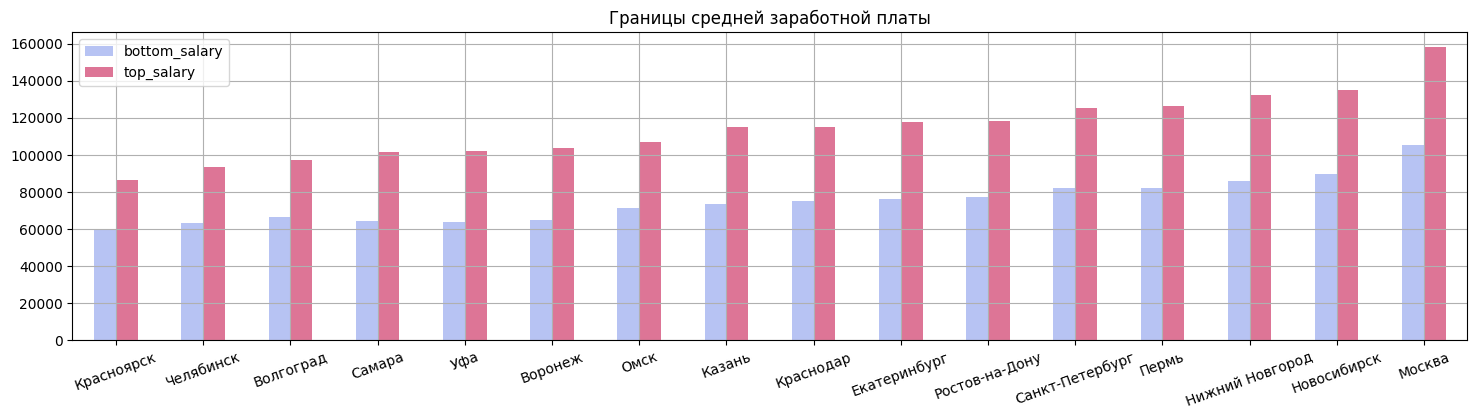

In [282]:
# текст запроса
query_5_7 = f'''select a.name as name, avg(v.salary_from) bottom_salary, avg(salary_to) top_salary --avg( coalesce(salary_from, salary_to) ) bottom_salary,  avg( coalesce(salary_to, salary_from) ) top_salary --
                from vacancies v
                join employers e on e.id=v.employer_id
                join areas a on a.id=v.area_id
                where a.name in (\'''' + '\',\''.join([str(item) for item in city_list]) +  '''\')
                and v.salary_from is not Null 
                and v.salary_to is not Null
                group by a.name
                         
                order by 3 asc
                
            '''
hh_df = pd.read_sql_query(query_5_7, connection)

# Строим диаграмму
p = hh_df.plot.bar(rot=20,
    figsize=[18,4],
    color=['#B7C3F3','#DD7596'],
    x = 0,
    grid='on',
    );
p.set(xlabel=None)
p.set_title('Границы средней заработной платы'); 

Как и ожидалось, наибольшие зарплаты предлагаются работодателями по городу Москве. Причем наименьшая средняя заработная плата даже выше наибольшей средней заработной платы почти трети других городов-миллионников. 

Наирольший разброс между минимальной и максимальной заработной плате наблюдается в Перми, Нижнем Новгороде, Новосибирске, Москве. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [283]:
# текст запроса
query_6_1 = f''' 
            select count(*)
            from vacancies v
            where lower(name) like '%data%' or lower(name) like '%данн%'
            '''

In [284]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [285]:
# текст запроса
query_6_2 = f'''
            select count(v.name)
            from vacancies v
            where (
                 lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or lower(name) like '%machine learning%'  
            or lower(name) like '%машинн%обучен%'
            or (name like '%ML%' and name not like '%HTML%')-- and name not like '%QML%')
            and (key_skills is not NULL)
            )
            and (
            lower(name)  like '%junior%'
            or experience  like '%Нет опыта%' 
            or employment  like '%Стажировка%' 
            )
            '''

In [286]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [287]:
# текст запроса
query_6_3 = f'''
            select count(v.name)
            from vacancies v
            where (
                lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or lower(name) like '%machine learning%'  
            or lower(name) like '%машинн%обучен%'
            or (name like '%ML%' and name not like '%HTML%')-- and name not like '%QML%')
            and (key_skills is not NULL)
            )
            and (
                key_skills like '%SQL%'  
            or key_skills like '%postgres%' 
            )
            '''


In [288]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [289]:
# текст запроса
query_6_4 = f'''
            select count(v.name)
            from vacancies v
            where (
                lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or lower(name) like '%machine learning%'  
            or lower(name) like '%машинн%обучен%'
            or (name like '%ML%' and name not like '%HTML%')-- and name not like '%QML%')
            and (key_skills is not NULL)
            )
            and (
                lower(key_skills) like '%python%' 
            )
            '''


In [290]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [291]:
# текст запроса
query_6_5 = f'''
            select avg(LENGTH(key_skills) - LENGTH(REPLACE(key_skills,'\t','')) + 1) 
            from vacancies v
            where (
                lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or lower(name) like '%machine learning%'  
            or lower(name) like '%машинн%обучен%'
            or (name like '%ML%' and name not like '%HTML%')-- and name not like '%QML%')
            and (key_skills is not NULL)
            )
            '''

In [292]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df
round(df,2)

,avg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [293]:
# текст запроса
query_6_6 = f'''
            select experience,  avg( (coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from) )/2 )
            from vacancies v
            where 
            (
                lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or lower(name) like '%machine learning%'  
            or lower(name) like '%машинн%обучен%'
            or (name like '%ML%' and name not like '%HTML%')-- and name not like '%QML%')
            )
            --and 
            --( 
            --    v.salary_from is not null 
            --or v.salary_to is not null
            --)
            group by experience
            
            '''

In [294]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df
round(df,2)

,experience,avg
0,Более 6 лет,NaN
1,Нет опыта,74642.86
2,От 1 года до 3 лет,139674.75
3,От 3 до 6 лет,243114.67


***

# выводы по предметному анализу

Только 3% от общего числа вакансий в базе имеют отношение к данным. 

Из них 27\% вакансий для дата-сайнтистов, из которых 2.8% вакансий -- для начинающего дата-сайнтиста. 

В 12\% от вакансий, имеющих отношение к данным, в качестве ключевого навыка указан SQL или postgres, так что эти навыки очень полезны для начинающего дата-сайнтиста.

Также, почти в 20\% от вакансий, имеющих отношение к данным, в качестве ключевого навыка указан Python.

Начинающий дата-сайнтист может расчитывать на заработрую плату от 70 тысяч рублей, и может претендовать на удвоенную зарплату уже через год работы.

# Общий вывод по проекту

In [295]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Посмотрим на популярность различных типов занятости и графиков работы среди работодателей

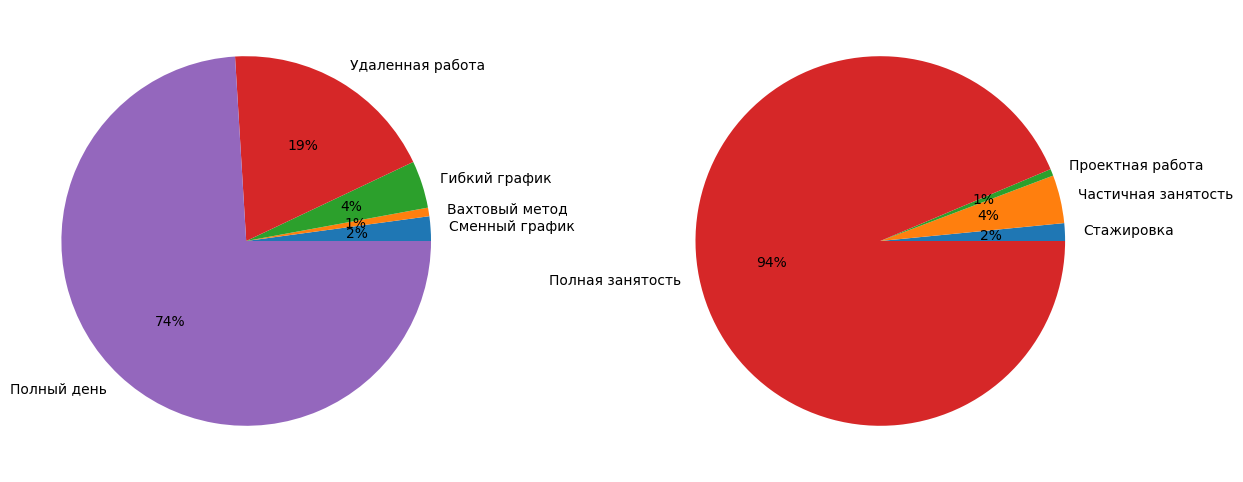

In [296]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 6))
#fig, axs = plt.subplots(2,2,figsize=(15,14))
i=0

for param in ['schedule', 'employment']:
    query = f'''select v.'''+ param +''' , count(v.employer_id) as cnt
                from vacancies v 
                group by 1
                '''
    hh_df = pd.read_sql_query(query, connection)
    
    # Строим диаграмму
    p = axes[i].pie(
        hh_df['cnt'],
        labels=hh_df[param],
        autopct='%1.0f%%',
        );
    #p.set_title('Границы заработной платы'); 
    i+=1  

Подавляющее число работодателей предлагают вакансии с полной занятостью и на полный день. 

На втором месте - всего лишь 4% от общего числа - вакансии с частичной занятостью.

Довольно много предложений по удаленной работе.

### Построим карту вакансий.

Для этого сначала создадим базу с географическими координатами городов из базы areas

Искать будем на сервисе Bing Maps используя API Key. 

Сохраним получившийся датафрейм в файл, чтобы проверяющим не нужно было генерировать API Key, а соответствующую ячейку закомментируем.



In [297]:
query_1a = f'''select a.id as id, a.name as area 
           from areas a 
        '''
df = pd.read_sql_query(query_1a, connection)
df

,id,area
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург
...,...,...
1357,5043,Звёздный Городок
1358,3934,Воротынск\n
1359,4825,Чемал
1360,3708,Усть-Нера


In [298]:
'''

#!pip install geocoder
import geocoder 

# Создаем функцию преобразования столбца названия города в его географические координаты
def find_coordinates(city):
    g = geocoder.bing(city, key='.....')
    results = g.json
    if results is None: 
        return None, None  # Если город не найдется, запишем None. 
    else:    
        return results['lat'], results['lng']
    
    
#создаем копию исходной таблицы чтобы не тратить время на чтение, если что пойдет не так
hh_data = hh_original.copy()

# Применяем функцию и распаковываем ответ  
df_cities['lat'],df_cities['lng'] = zip(*df_cities['area'].apply(find_coordinates));
display(df_cities)

#создаем копию исходной таблицы чтобы не тратить время на чтение, если что пойдет не так
df_cities_original = df_cities.copy()

# Сохраняем получившийся датафрейм в csv файл 
df_cities.to_csv('df_cities.csv', sep=',', encoding='utf-8',index=False) 

'''

"\n\n#!pip install geocoder\nimport geocoder \n\n# Создаем функцию преобразования столбца названия города в его географические координаты\ndef find_coordinates(city):\n    g = geocoder.bing(city, key='AkZEPsZLsZ7v_FQWhzGClxtajQeuAmIkgGHN7n_sg8DJ-DvxlDwe4QayDH3uWESj')\n    results = g.json\n    if results is None: \n        return None, None  # Если город не найдется, запишем None. \n    else:    \n        return results['lat'], results['lng']\n    \n    \n#создаем копию исходной таблицы чтобы не тратить время на чтение, если что пойдет не так\nhh_data = hh_original.copy()\n\n# Применяем функцию и распаковываем ответ  \ndf_cities['lat'],df_cities['lng'] = zip(*df_cities['area'].apply(find_coordinates));\ndisplay(df_cities)\n\n#создаем копию исходной таблицы чтобы не тратить время на чтение, если что пойдет не так\ndf_cities_original = df_cities.copy()\n\n# Сохраняем получившийся датафрейм в csv файл \ndf_cities.to_csv('df_cities.csv', sep=',', encoding='utf-8',index=False) \n\n"

Чтобы вам не выгружать данные из Bing maps, читаем координаты из предварительно сохраненного файла

In [299]:
df_cities = pd.read_csv('df_cities.csv', sep=',', encoding='utf-8' )  
display(df_cities)

,id,area,lat,lng
0,2758,Тбилиси,41.722500,44.792500
1,8,Майкоп,44.605553,40.108887
2,1180,Нерюнгри,56.671886,124.643188
3,1240,Новокузнецк,53.754051,87.129951
4,2,Санкт-Петербург,59.938484,30.312485
...,...,...,...,...
1357,5043,Звёздный Городок,55.876835,38.112644
1358,3934,Воротынск\n,54.429672,36.045361
1359,4825,Чемал,51.408066,86.001259
1360,3708,Усть-Нера,64.567574,143.234558


In [300]:
# Создаем запрос списка id городов и количеством вакансий в них
 
query_1a = f'''select v.area_id as id, count(v.id) as count
           from vacancies v
           group by v.area_id
           order by 2 asc
        '''
df = pd.read_sql_query(query_1a, connection)
df

,id,count
0,3295,1
1,2108,1
2,1640,1
3,3812,1
4,2050,1
...,...,...
764,160,1892
765,4,2006
766,1002,2112
767,2,2851


In [301]:
# Объединяем таблицы по id городов 
data = pd.merge(df, df_cities, on='id') 
data


,id,count,area,lat,lng
0,3295,1,Старотитаровская,45.218731,37.147282
1,2108,1,Индонезия,-0.199674,114.009979
2,1640,1,Мензелинск,55.717472,53.073486
3,3812,1,Новохопёрск,51.093708,41.610870
4,2050,1,Звенигород,55.730942,36.853714
...,...,...,...,...,...
764,160,1892,Алматы,43.236393,76.945724
765,4,2006,Новосибирск,55.049999,82.949997
766,1002,2112,Минск,53.897686,27.549421
767,2,2851,Санкт-Петербург,59.938484,30.312485


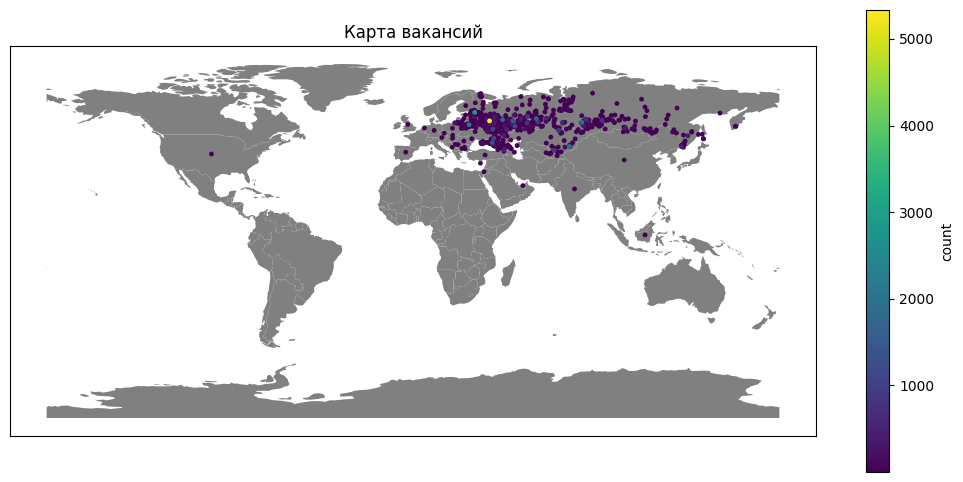

In [302]:
# initialize an axis
# !pip install geopandas
import geopandas as gpd

fig, ax = plt.subplots(figsize=(13,6))

# plot map on axis
countries = gpd.read_file( gpd.datasets.get_path("naturalearth_lowres"))
#countries[countries["name"] == "Russia"].plot(color="lightgrey", ax=ax)
countries.plot(color="grey", ax=ax)

# plot points
data.plot.scatter(x="lng", y="lat", s=6, c='count', #kind="scatter", #s="count", 
               colormap="viridis", 
        title=f"Карта вакансий", 
        ax=ax)

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis 
ax.get_yaxis().set_visible(False)

plt.show()

Большинство вакансий представлены по России, однако также есть вакансии в США, Китае, Индии и др.

Больше всего вакансий в Москве.

In [303]:
# не забываем закрыть соединение после окончания работы
connection.close()